In [1]:
from classificazione_knn import image_to_data, colimage_to_classes, local_entropy, classes_to_colimage
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import imageio
import matplotlib.pyplot as plt

In [2]:
%time layers = image_to_data("img/pelle303R.PNG", size = 30)

CPU times: user 35.1 s, sys: 224 ms, total: 35.4 s
Wall time: 50 s


In [3]:
def select_layers(layers, feature_names=[]):
    
    if len(feature_names) == 0:
        feature_names = [
            #"R", "G", "B",
            #"R_mf", "G_mf", "B_mf",
            #"R_edge", "G_edge", "B_edge",
            #"R_variance", "G_variance", "B_variance",

            #"L", "a", "b",
            #"L_mf", "a_mf", "b_mf",
            #"L_edge", "a_edge", "b_edge",
            #"L_variance", "a_variance", "b_variance",

            "h", "s", "v",
            "h_mf", "s_mf", "v_mf",
            #"h_edge", "s_edge", "v_edge",
            "h_variance", "s_variance", "v_variance",

            "entropy"
        ]
    
    selected = [layers[fn] for fn in feature_names]
    
    # Unisco i vettori di features in una matrice
    # con una riga per featur ed una colonna per pixel
    X = np.stack([l.ravel() for l in selected])

    # Traspongo perchè voglio colonne per features
    # e righe per pixel
    return X.T

In [4]:
X = select_layers(layers)

In [5]:
# Estrarre le etichette per questi dati dall'immagine colorata pelle3_colors.png
y = colimage_to_classes("img/pelle303R_colors.PNG")

In [6]:
# Usiamo una seconda immagine come test
test_layers = image_to_data("img/pelle305R.PNG")
X_test = select_layers(test_layers)
y_test = colimage_to_classes("img/pelle305R_colors.PNG")

In [7]:
# training di un KNN
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
knn.fit(X, y)

KNeighborsClassifier()

In [12]:
# scoring dell'accuratezza del modello
knn.score(X_test[:1000], y_test[:1000])

0.807

In [13]:
# scoring utilizzando il coefficiente di Matthews
from sklearn.metrics import matthews_corrcoef

In [14]:
y_predette = knn.predict(X_test)

In [15]:
matthews_corrcoef(y_test, y_predette)

0.7500722535355688

In [16]:
test_img = imageio.imread("img/pelle305R_colors.PNG")

In [17]:
img_predetta = classes_to_colimage(y_predette, test_img.shape)

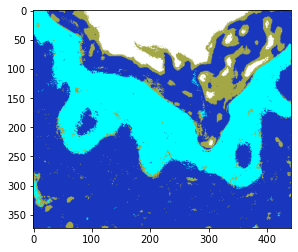

In [18]:
plt.imshow(img_predetta)

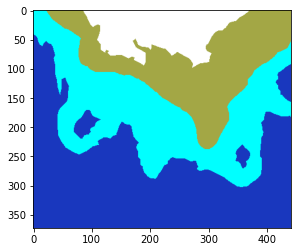

In [19]:
plt.imshow(test_img)